In [14]:

from openseespy.opensees import *
wipe()
model('Basic', '-ndm', 3)
coordTransf = "Linear"  # Linear, PDelta, Corotational
vec_col = [1, 0, 0]
vec_viga = [0, 0, 1]
# Parametros:
h = 4
b = 4
l = 4

# Materiales y secciones
hr = 0.3
br = 0.3
E = 2.1e6
v = 0.2
G = E / (2 * (1 + v))
A = hr * br
Jx = hr*br**3*(16/3 - 3.36*br/hr*(1-(br/hr)**4/12))/16
Iy = hr * br**3 / 12
Iz = br * hr**3 / 12
Asy = 5/6 * A
Asz = 5/6 * A

coords = {
    1: (0, 0, 0),
    2: (l, 0, 0),
    3: (l, b, 0),
    4: (0, b, 0),
    5: (0, 0, h),
    6: (l, 0, h),
    7: (l, b, h),
    8: (0, b, h),
}


for i, coord in coords.items():
    node(i, *coord)

geomTransf(coordTransf, 1, *vec_col, '-jntOffset', 0, 0)
geomTransf(coordTransf, 2, *vec_viga, '-jntOffset', 0, 0)

element('ElasticTimoshenkoBeam', 1, *[1, 5], E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
element('ElasticTimoshenkoBeam', 2, *[2, 6], E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
element('ElasticTimoshenkoBeam', 3, *[3, 7], E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
element('ElasticTimoshenkoBeam', 4, *[4, 8], E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
element('ElasticTimoshenkoBeam', 5, *[5, 6], E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
element('ElasticTimoshenkoBeam', 6, *[6, 7], E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
element('ElasticTimoshenkoBeam', 7, *[7, 8], E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
element('ElasticTimoshenkoBeam', 8, *[8, 5], E, G, A, Jx, Iy, Iz, Asy, Asz, 2)

# element('ElasticTimoshenkoBeam', eleTag, *eleNodes, E_mod, G_mod, Area, Jxx, Iy, Iz, Avy, Avz, transfTag, <'-mass', massDens>, <'-cMass'>)


fixed = [1, 1, 1, 1, 1, 1]
for i in [1, 2, 3, 4]:
    fix(i, *fixed)

timeSeries('Linear', 1)
pattern('Plain', 1, 1)
load(5, 100, 100, 100, 0, 0, 0)

integrator('LoadControl', 1.0)
algorithm('Linear')
analysis('Static')
analyze(1)


WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


0

np.float64(2.313830734033814)

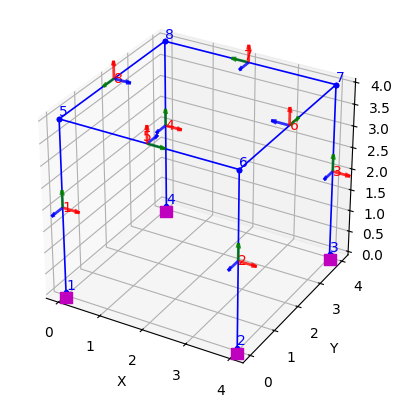

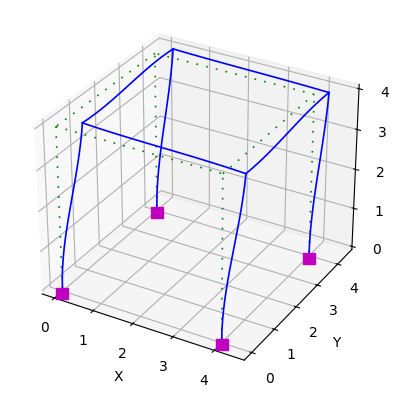

In [15]:
import opsvis as opsv
import matplotlib.pyplot as plt
opsv.plot_model()
opsv.plot_defo()

In [16]:
import numpy as np

ele_tag = 8
xloc = eleResponse(ele_tag, 'xlocal')
yloc = eleResponse(ele_tag, 'ylocal')
zloc = eleResponse(ele_tag, 'zlocal')
g = np.vstack((xloc, yloc, zloc))

print(g)

[[ 0. -1.  0.]
 [ 1.  0. -0.]
 [ 0.  0.  1.]]


In [17]:

import pandas as pd
data = {}
for i in [5, 6, 7, 8]:
    node_disp = nodeDisp(i)
    data[f"Node {i}"] = node_disp

df = pd.DataFrame(data, index=['UX', 'UY', 'UZ', 'RX', 'RY', 'RZ']).round(6)
print(df)

      Node 5    Node 6    Node 7    Node 8
UX  0.172873  0.171818  0.102244  0.102245
UY  0.172873  0.102245  0.102244  0.171818
UZ  0.003214 -0.000196 -0.000706 -0.000196
RX -0.025756 -0.016084 -0.016059 -0.025519
RY  0.025756  0.025519  0.016059  0.016084
RZ  0.000000 -0.000181  0.000000  0.000181


In [18]:
# import vfo.vfo as vfo
# vfo.plot_model()

In [19]:
print(eleResponse(1, 'Tlqwertyg'))

[]
